<a href="https://colab.research.google.com/github/tvisha03/Machine-learning-projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
credit_data = pd.read_csv('/content/creditcard.csv')

In [8]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [13]:
credit_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [12]:
credit_data.shape

(284807, 31)

In [14]:
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]


In [15]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [17]:
fraud.Amount.describe()


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [18]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
legit_sample = legit.sample(n=492)

In [20]:
df = pd.concat([legit_sample, fraud], axis=0)

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78881,57751.0,-0.801304,1.132463,1.006913,1.361525,-0.363627,0.047675,0.323084,0.587035,-0.299994,...,0.014739,0.160874,0.004657,0.042328,-0.090676,-0.217485,0.283634,0.142174,48.33,0
192597,129771.0,1.855759,-2.011796,-2.046949,-1.711674,-0.727275,-0.394574,-0.415708,-0.225738,-1.882026,...,-0.156840,-0.723881,0.040723,0.137431,-0.239127,-0.357743,-0.085251,-0.023428,268.00,0
8480,11358.0,-4.551230,5.045272,-1.565375,0.187631,0.167360,1.816923,-2.787591,-12.536217,2.992954,...,11.170535,-3.558973,1.649037,-0.716390,-0.191182,-0.431816,0.279762,-0.371017,0.89,0
263023,160761.0,2.055799,0.147831,-1.664957,0.446035,0.366932,-0.935855,0.202093,-0.249867,0.472701,...,-0.353050,-0.921667,0.345983,0.641408,-0.271128,0.164303,-0.063156,-0.028131,7.99,0
123282,76869.0,1.080407,-0.210580,1.334667,0.740057,-0.890179,0.390783,-0.758521,0.310692,0.559601,...,0.008377,0.244389,0.065846,0.289692,0.145180,0.313902,0.033750,0.017241,9.53,0


In [22]:
df.shape

(984, 31)

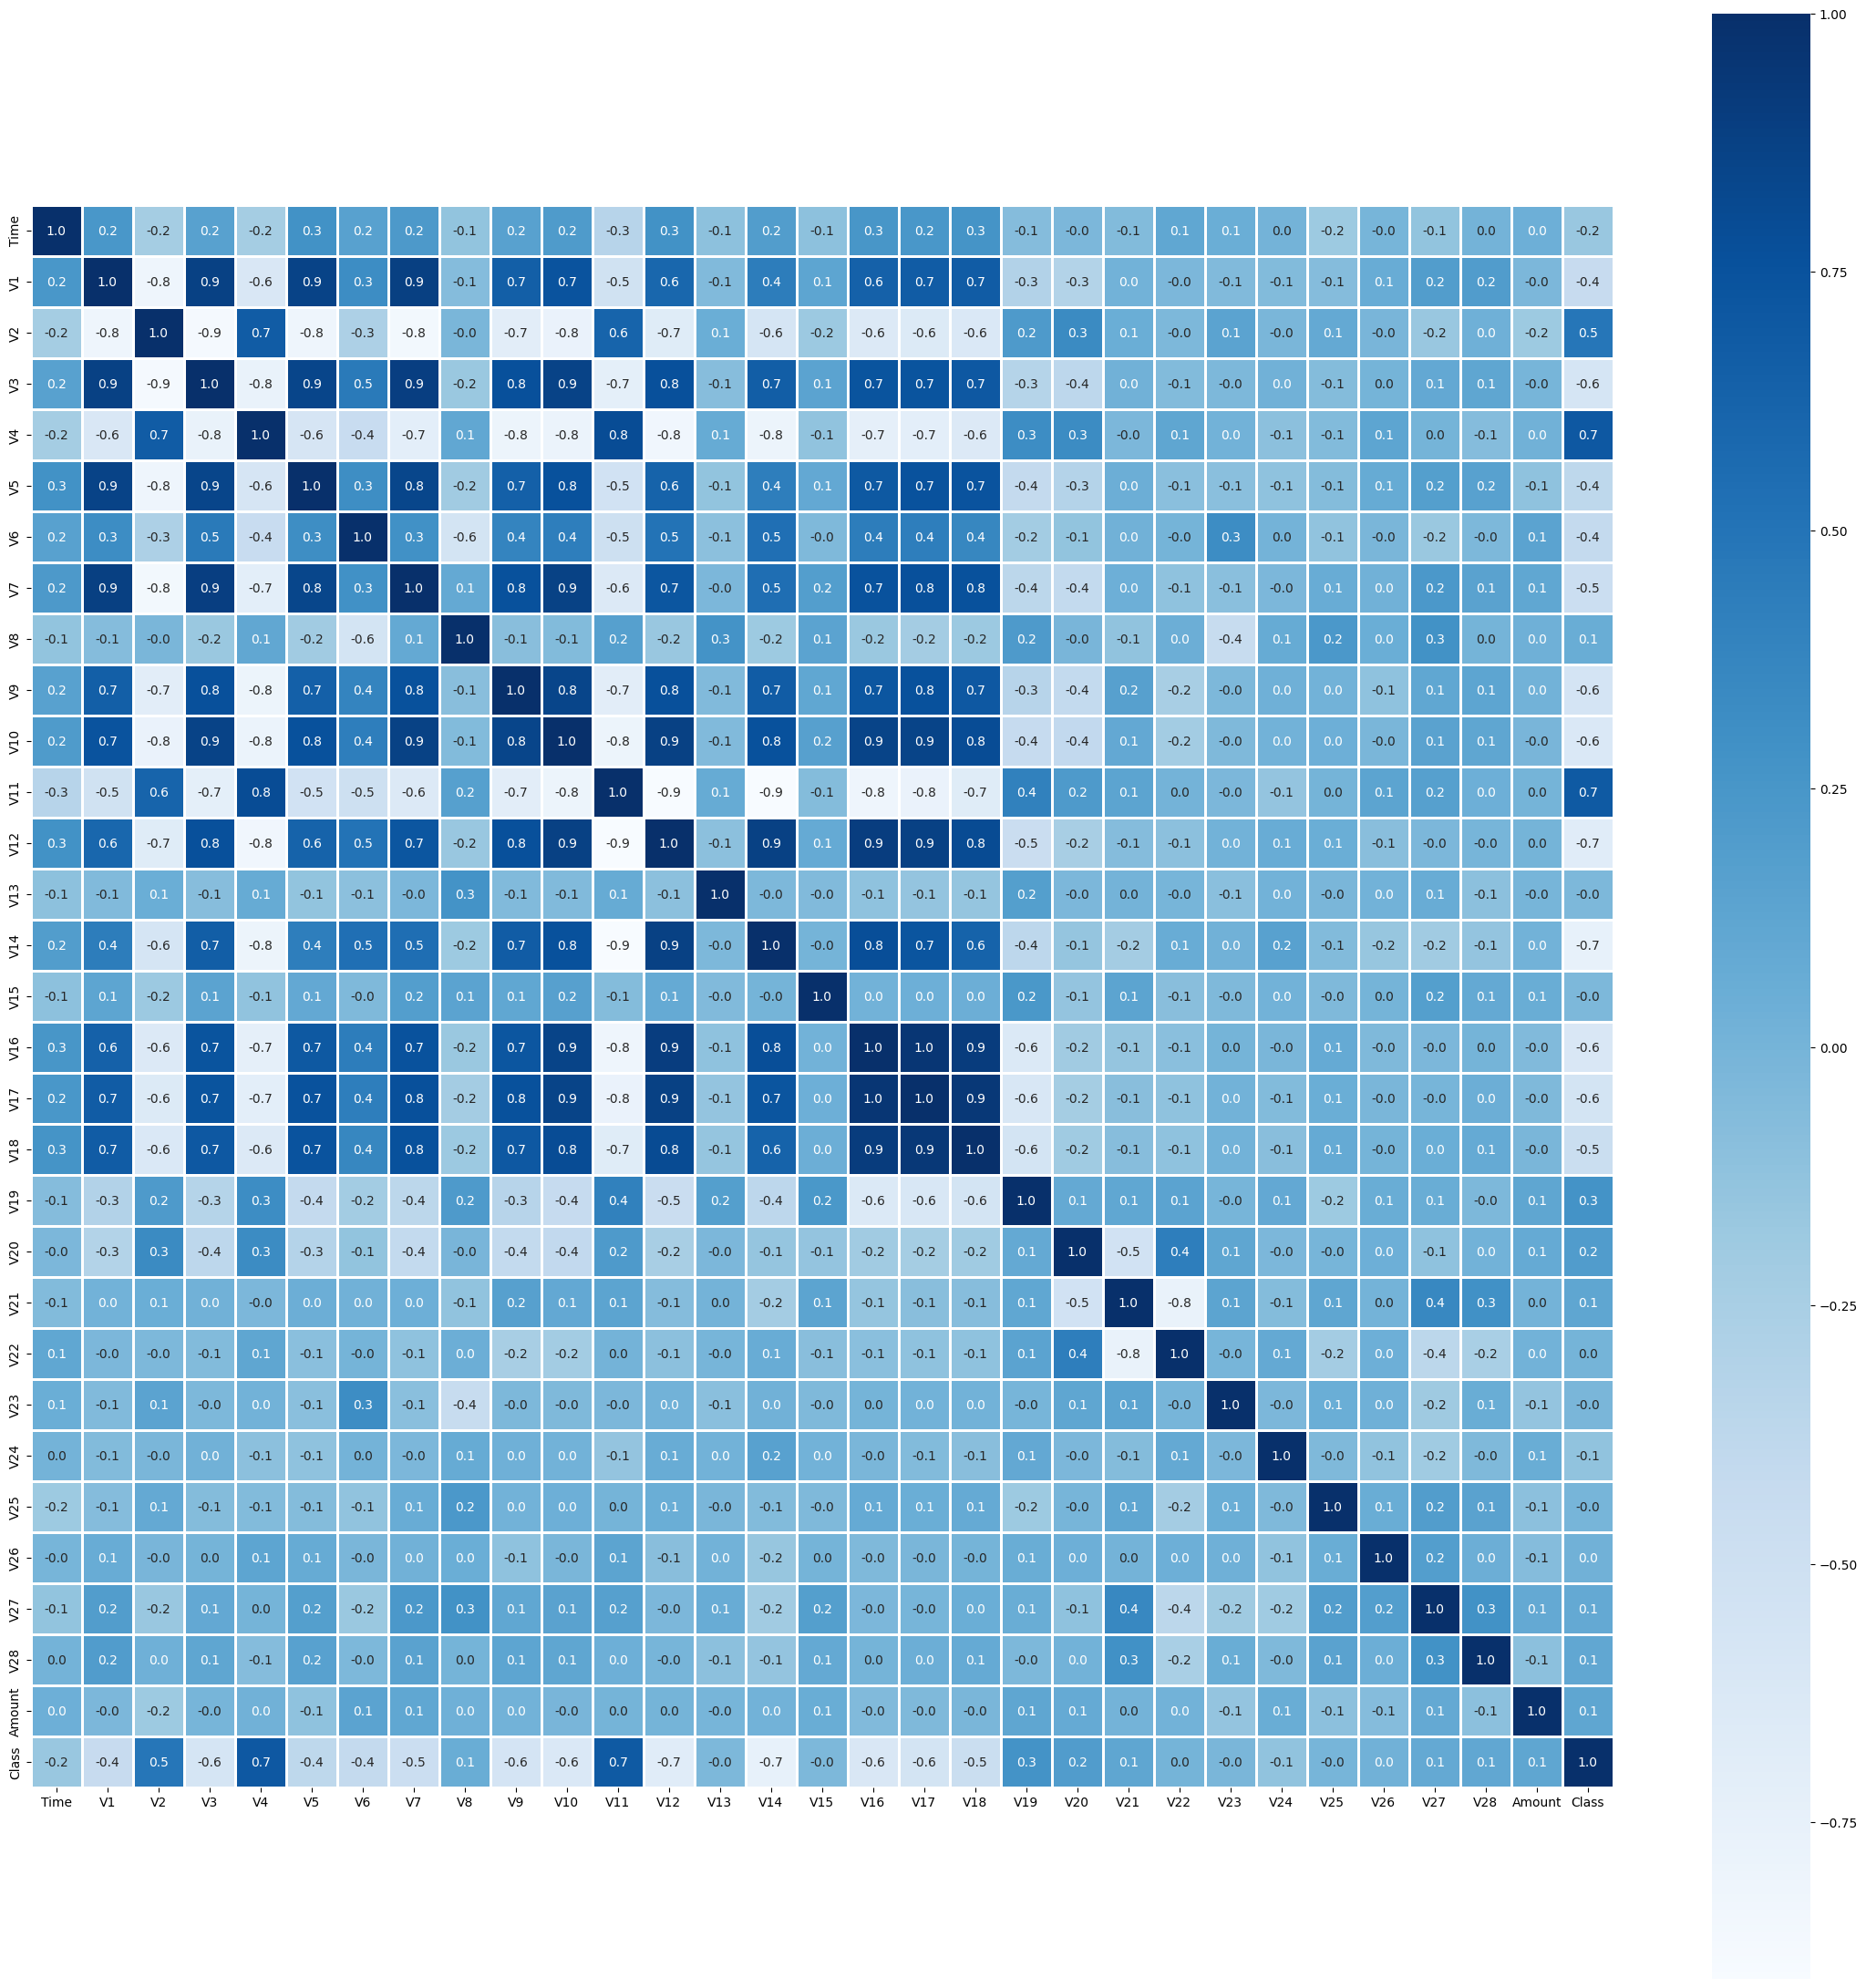

In [26]:
plt.figure(figsize=(28,28))
sns.heatmap(df.corr(), annot=True, linewidths=1 , fmt='.1f', cmap='Blues', square=True, annot_kws={'size':10})
plt.show()

In [28]:
X= credit_data.drop(columns='Class', axis=1)
Y= credit_data['Class']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
model= LogisticRegression()

In [32]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction, Y_train)
print("Training data prediction: ", training_data_accuracy)

Training data prediction:  0.9989247075862977


In [34]:
test_data_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_data_prediction, Y_test)
print("Test data prediction: ", test_data_accuracy)

Test data prediction:  0.9990519995786665
